$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Linear Model

<br/><br/><br/><br/>

### ITCS5156
### Spring 2021

### Minwoo "Jake" Lee



# Review

<img src="https://cdn-images-1.medium.com/max/1600/1*_QGyIwpgq831xI54cIe_GQ.jpeg" width=1200 />


# Review


<img src="http://www.cognub.com/wp-content/uploads/2016/02/1.png" width=1000 />

# Today: (Linear) Regression

* Linear Model
* Linear Regression
  * Ordinary Least Squares
  * Ridge Regression
  * Lasso Regression
  * Elastic Net
* Stochastic Gradient Descent

# Parameteric vs Non-Parametric

-| Parametric | Non-Parametric
-|--|--
Mapping Function| $$f(x; \wv)$$ | $$ f(x;$$ <strike>$$\wv$$</strike> $$ ) $$
Parameters | fixed size | None
Functional Form| Pre-determined | Free (no assumption)
Pros | Simple, Fast, Less Data | Flexible
Cons | Poor when the model assumption is incorrect | Slow, More Data, Overfitting
Algorithms | **Linear Regression**, Logistic Regression, Naive Bayes,<br/> Linear Discriminant Analysis, Neural Networks | k-Nearest Neighber, Decision Trees, Support Vector Machines

# Vector/Matrix Notations


$$
\begin{align}
\xv &= [x_1, x_2, \cdots, x_D]^\top \\
\Xm &= \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N1} & x_{N2} & \dots  & x_{ND}
\end{bmatrix}\\
\\
\tv &= [t_1, t_2, \cdots, t_N]^\top \\
\Tm &= \begin{bmatrix}
    t_{11} & t_{12} & \dots  & t_{1K} \\
    t_{21} & t_{22} & \dots  & t_{2K} \\
    \vdots & \vdots & \ddots & \vdots \\
    t_{N1} & t_{N2} & \dots  & t_{NK}
\end{bmatrix}\\
\\
\wv &= [w_0, w_1, \cdots, w_D]^\top \\
\end{align}
$$

# Linear Model

- linear combination of input $\xv$ and weight $\wv$, so dot product

$$
\begin{align*}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}
$$



# Linear Model for Regression := Linear Regression



# What can be a linear regression model for your data?



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [ ]:

X = np.linspace(0,10, 101)
T = 2 * X  + 4+ np.random.rand(101) * 5


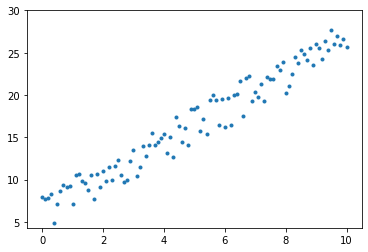

In [ ]:

def data_scatter(X=X, T=T):
    plt.plot(X, T, '.')
    plt.xlim([-0.5, 10.5])
    plt.ylim([4.3, 30])
data_scatter()

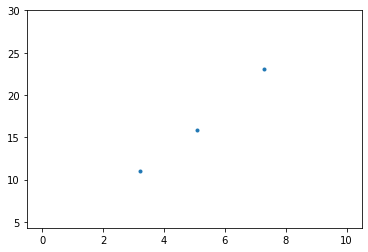

In [ ]:
p = [51,32, 73]
data_scatter(X[p], T[p])

# How Many Solutions Do We Have?

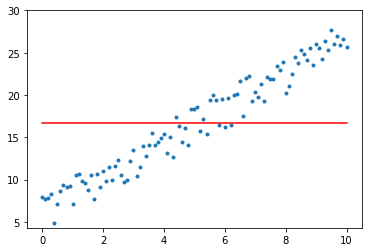

In [ ]:
mean = np.mean(T)

data_scatter()
plt.plot([0, 10],[mean, mean], 'r-')

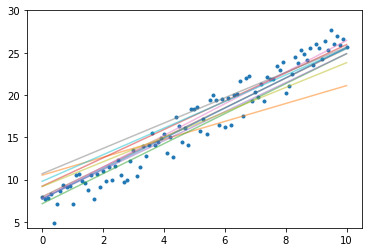

In [ ]:
n_solutions = 10
pairs = np.vstack((np.random.choice(T[:20], n_solutions),
                   np.random.choice(T[-20:], n_solutions))).T

data_scatter()
for pair in pairs:
    plt.plot([0, 10],pair, '-', alpha=0.5)

# How can we find the best solution?

# Goal: Minimize the errors := Objective Function

- Error Function
$$
E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2
$$


# Goal: Minimize the errors := Objective Function

- Error Function
$$
\begin{align}
E(\wv) &= \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2 \\
        &= (\Xm \wv - \tv)^\top (\Xm \wv - \tv)
\end{align}
$$


# Solution: Searching for the weights

$$
\begin{align*}
\wv^* &= \arg\min_\wv \sum_{i=1}^{N} E(\wv) \\
      &= \arg\min_\wv \sum_{i=1}^{N} \Big( f(\xv_i; \wv) - t_i \Big)^2 \\
      &= \arg\min_\wv  (\Xm \wv - \tv)^\top (\Xm \wv - \tv)
\end{align*}
  $$

# Least  Squares

* How do we fine the $\wv$ that minimize the error?

* Derivation to find the tangent slope becomes zero!

$$\frac{\partial E(\wv)}{\partial \wv} = \frac{\partial (\Xm \wv - \tv)^\top (\Xm \wv - \tv)}{\partial \wv} = 0 $$

$$
\begin{align}
\frac{\partial E(\wv)}{\partial \wv} &= \frac{\partial (\Xm \wv - \tv)^\top (\Xm \wv - \tv)}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv - 2 \tv^\top \Xm \wv + \tv^\top \tv )}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv)}{\partial \wv} - 2 \Xm^\top \tv \\
        \\
        &= \Xm^\top \Xm \wv + (\Xm^\top \Xm)^\top \wv - 2 \Xm^\top \tv  \\
        \\
        &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv \\
        &= 0
\end{align}
$$

$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv  &= 0\\
\\
\Xm^\top \Xm \wv &= \Xm^\top \tv\\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv
\end{align}
$$

# Ordinary Least Squares in Python

In [ ]:
# the number of data samples
N = X.shape[0]

# add ones' column to data matrix X to include a bias for learning
bias = np.ones(N)
X1 = np.vstack((bias, X)).T

# least square solution
w = np.linalg.lstsq(X1.T @ X1, X1.T @ T, rcond=-1)[0]


Weights: [6.51520698 2.03458637]
Predictions: [ 6.51520698 26.86107071]


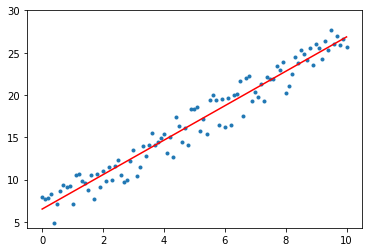

In [ ]:
# test data input 0 and 10 for drawing the fit line
# 1 is added for bias computation
X1test = np.array([[1, 0], [1, 10]])

# prediction - simple dot product
y = X1test @ w

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {}".format(w))
print("Predictions: {}".format(y))

# In Scikit.Learn


* well software engineered
* unified interfaces for all models
  1. create an object `model`
  2. train the `model` by calling `fit` method
  3. make a prediction by calling `predict` method

In [ ]:
# Prepare X vector into 2D matrix
X = X.reshape((-1, 1))

Weights: 6.5152069831976895 [2.03458637]
Predictions: [ 6.51520698 26.86107071]


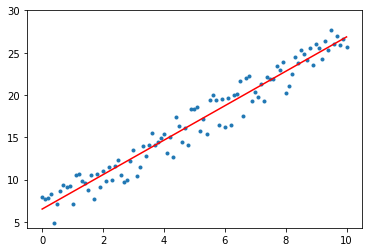

In [ ]:
from sklearn import linear_model

# create a linear regression object
model = linear_model.LinearRegression()

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Ridge Regression


## $$E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2 + \color{red}{\alpha \Vert \wv \Vert_2^2}$$

Weights: 6.521128363794475 [2.0334021]
Predictions: [ 6.52112836 26.85514933]


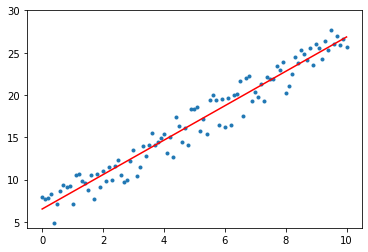

In [ ]:

# create a linear regression object
# <=====================================
model = linear_model.Ridge(alpha=0.5)

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Lasso Regression


## $$E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2 + \color{red}{\alpha \Vert \wv \Vert_1}$$


Weights: 6.809324630256516 [1.97576284]
Predictions: [ 6.80932463 26.56695307]


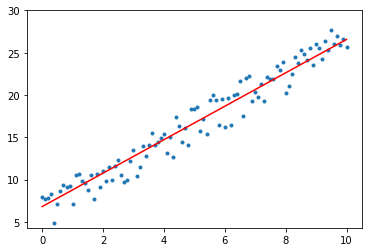

In [ ]:

# create a linear regression object
model = linear_model.Lasso(alpha=0.5)

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Elastic Net

### $$E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2 + \color{red}{\alpha_1 \Vert \wv \Vert_1 + \alpha_2 \Vert \wv \Vert_2^2} $$

### In Scikit.Learn

#### $$E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2 + \color{red}{\alpha \Big( \rho \Vert \wv \Vert_1 + (1 -\rho) \Vert \wv \Vert_2^2 \Big)} $$


Weights: 6.89392834502328 [1.9588421]
Predictions: [ 6.89392835 26.48234935]


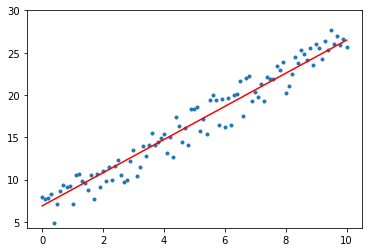

In [ ]:


# create a linear regression object
model = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.7)

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Spliting Data


* Why?
  * Generalization:
> "We want to PREDICT for UNSEEN data using the trained model!"
* How?
  * Given data, split them and spare some for testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, T, test_size=0.2, random_state=10)

print(X.shape, X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(101, 1) (80, 1) (21, 1) (80,) (21,)


#  Learning Curve

In [ ]:
### Codes from Geron's book

from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown


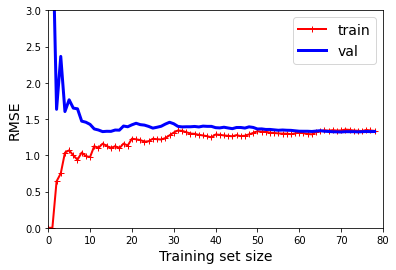

In [ ]:
lin_reg = linear_model.LinearRegression()
plot_learning_curves(lin_reg, X, T)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown


## 1. As the number of training data grows, training error grows.


## 2. When there are not enough training data, the test performance gets poor. (Poor *Generalization*)


## 3. The gap between train and validation (test) gets closer and both reach to the plateau.  


## => Underfitting Example



# Model Complexity, Overfitting, Underfitting, ...

<br/>

<img src="https://d2l.ai/_images/capacity-vs-error.svg" width=800 />


## => Early Stopping

Weights: 6.89392834502328 [1.9588421]
Predictions: [ 6.89392835 26.48234935]


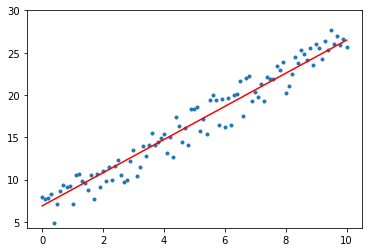

In [ ]:

# create a linear regression object
reg = linear_model.LinearRegression()

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Batch vs Online Learning

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/01/schematics.png" width=800 />

# Stochastic Gradient Descent



Weights: [6.2278398] [2.05251042]
Predictions: [ 6.2278398  26.75294403]


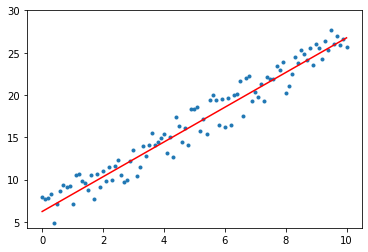

In [ ]:

# create a linear regression object
model = linear_model.SGDRegressor(alpha=0.5, l1_ratio=0.7)

# train the model using (X'X)`X'T
model.fit(X, T)

# make a prediction with the same data
y = model.predict(X1test[:, 1:])

# plot the prediction line
data_scatter() # scatter plot of training samples
plt.plot([0, 10], y, 'r-')

# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

#model.get_params()

# Stochastic Gradient Descent



In [ ]:
#https://github.com/jupyter/notebook/issues/534

from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Weights: [1.19736791] [2.8713611]
Predictions: [ 1.19736791 29.91097896]


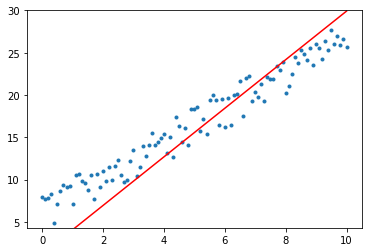

In [ ]:
import IPython.display as ipd  # for display and clear_output

epochs = 1  # let us see only one epoch to see how it runs

# create a linear regression object
# alpha here is learning rates
model = linear_model.SGDRegressor(alpha=0.5)

# plot the prediction line
fig = plt.figure()

# indices of data samples
rng = np.arange(N)

# sequential learning
for e in range(epochs):
    # shuffle them to randomly feed for online training
    np.random.shuffle(rng)
    # list for remember what data are presented
    pres_k = []

    for k in rng:
        pres_k.append(k)

        # train the model using stochastic gradient descent
        model.partial_fit(X[k:k+1], T[k:k+1])   # <==========

        # make a prediction with the same data
        y = model.predict(X1test[:, 1:])

        # plot the data so far presented and current prediction line
        plt.clf()  # clear figure to redraw
        data_scatter(X[pres_k], T[[pres_k]])  # show the data only presented for training
        plt.plot([0, 10], y, 'r-')

        ipd.clear_output(wait=True)
        ipd.display(fig)
    ipd.clear_output(wait=True)


# print the weights
print("Weights: {} {}".format(model.intercept_, model.coef_))
print("Predictions: {}".format(y))

# Penalties (L1, L2)?

## Unit Ball Comparision


In [ ]:
#https://github.com/jupyter/notebook/issues/534

from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

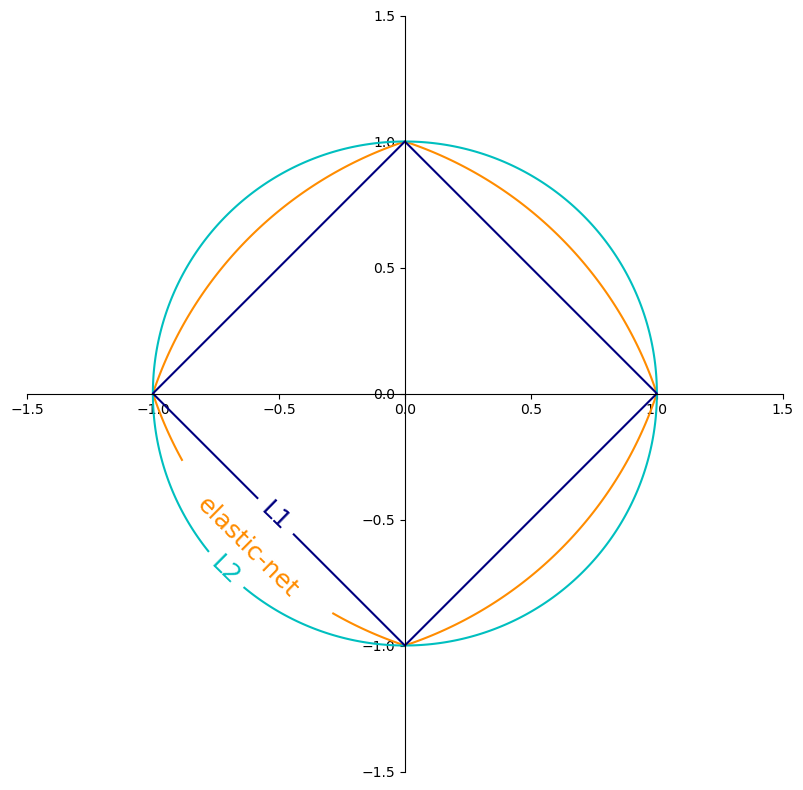

In [ ]:
# codes from scikit.learn :
#  https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_penalties.html#sphx-glr-download-auto-examples-linear-model-plot-sgd-penalties-py
import numpy as np
import matplotlib.pyplot as plt

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"

line = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(line, line)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)
rho = 0.5
elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(8, 8), dpi=100)
ax = plt.gca()

elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1],
                                  colors=elastic_net_color)
l2_contour = plt.contour(xx, yy, l2, levels=[1], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[1], colors=l1_color)
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.clabel(elastic_net_contour, inline=1, fontsize=18,
           fmt={1.0: 'elastic-net'}, manual=[(-1, -1)])
plt.clabel(l2_contour, inline=1, fontsize=18,
           fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=18,
           fmt={1.0: 'L1'}, manual=[(-1, -1)])

plt.tight_layout()
plt.show()

# Next: Data Preprocessing

![](https://miro.medium.com/max/500/1*iPax8sBgtmJchiGChLsGIA.png)
